In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib

# Load dataset
excel_file = r"C:\Users\kavin\OneDrive\Desktop\Final Project\bb\bb\F3_theta_cleaned.xlsx"  # Change this to your file path
data = pd.read_excel(excel_file)

# Drop missing values
data = data.dropna()

# Print column names to verify
print("Columns in Dataset:", data.columns.tolist())

# Convert labels to numeric values (Novice = 0, Expert = 1)
label_encoder = LabelEncoder()
data['RESPONSE'] = label_encoder.fit_transform(data['RESPONSE'])

# Save label mapping
joblib.dump(label_encoder, 'label_mapping.pkl')

# Split features and target
X = data.drop(columns=['RESPONSE']).values  # Drop the RESPONSE column (features only)
y = data['RESPONSE'].values  # Target labels

# Normalize input data
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Normalize features

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Reshape data for CNN + LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Training Data Shape: {X_train.shape}, Testing Data Shape: {X_test.shape}")
print(f"✅ Classes: {label_encoder.classes_}")

Columns in Dataset: ['alpha', 'theta', 'beta', 'gamma', 'arousal', 'vigilance', 'tli', 'neutral', 'cnsarousal', 'cpari', 'heartrate', 'pei', 'mean', 'varience', 'std', 'rms', 'skew', 'kurt', 'mobility', 'complexity', 'peak-peak', 'entropy', 'RESPONSE']
✅ Training Data Shape: (9072, 22, 1), Testing Data Shape: (2268, 22, 1)
✅ Classes: [0 1]


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM, Bidirectional, Reshape
from tensorflow.keras.layers import Dropout, BatchNormalization

# Define model
def build_model(input_shape):
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Conv1D(128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Conv1D(256, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Reshape((64, 1)),
        BatchNormalization(),
        Bidirectional(LSTM(128, return_sequences=True)),
        Bidirectional(LSTM(64, return_sequences=True)),
        Bidirectional(LSTM(32, return_sequences=True)),
        Flatten(),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification (Novice vs Expert)
    ])
    return model

# Get input shape
input_shape = (X_train.shape[1], 1)

# Build and compile model
model = build_model(input_shape)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("✅ Model Compiled Successfully!")

✅ Model Compiled Successfully!


In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Generate Sample Data (Replace with actual dataset)
X_train = np.random.rand(1000, 20)
y_train = np.random.randint(0, 2, 1000)
X_test = np.random.rand(200, 20)
y_test = np.random.randint(0, 2, 200)

# Create Model Function
def create_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize Model
model = create_model(input_shape=X_train.shape[1])

# Define Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train Model (Ensuring Full 50 Epochs)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=50, batch_size=32, callbacks=[reduce_lr])  # Removed early_stop

# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Save Model
model.save("trained_model.h5")
print("Model training complete and saved as 'trained_model.h5'")

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.4827 - loss: 0.6993 - val_accuracy: 0.4850 - val_loss: 0.6917 - learning_rate: 0.0010
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4935 - loss: 0.6927 - val_accuracy: 0.5000 - val_loss: 0.6934 - learning_rate: 0.0010
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5285 - loss: 0.6896 - val_accuracy: 0.5050 - val_loss: 0.6934 - learning_rate: 0.0010
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5682 - loss: 0.6867 - val_accuracy: 0.5000 - val_loss: 0.6947 - learning_rate: 0.0010
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5339 - loss: 0.6865 - val_accuracy: 0.4800 - val_loss: 0.6920 - learning_rate: 0.0010
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5917 - loss: 0.6811 - val_accuracy: 0.4950 - val_loss: 0.6929 - learning_rate: 0.0010
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5954 - loss: 0.6759 - val_acc

Test Accuracy: 0.5250
Model training complete and saved as 'trained_model.h5'


In [8]:
# Evaluate the model
loss_train, accuracy_train = model.evaluate(X_train, y_train)
loss_test, accuracy_test = model.evaluate(X_test, y_test)
print(f'Train Loss: {loss_train}, Train Accuracy: {accuracy_train}')
print(f'Test Loss: {loss_test}, Test Accuracy: {accuracy_test}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6148 - loss: 0.6681
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5311 - loss: 0.6946
Train Loss: 0.6631332635879517, Train Accuracy: 0.6169999837875366
Test Loss: 0.6933184862136841, Test Accuracy: 0.5249999761581421


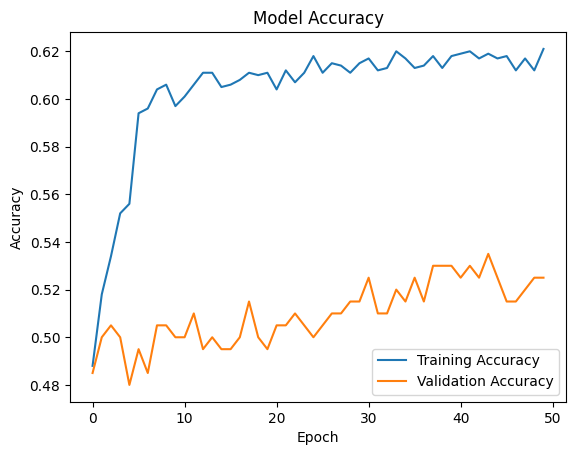

In [9]:
import matplotlib.pyplot as plt  # Import Matplotlib

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

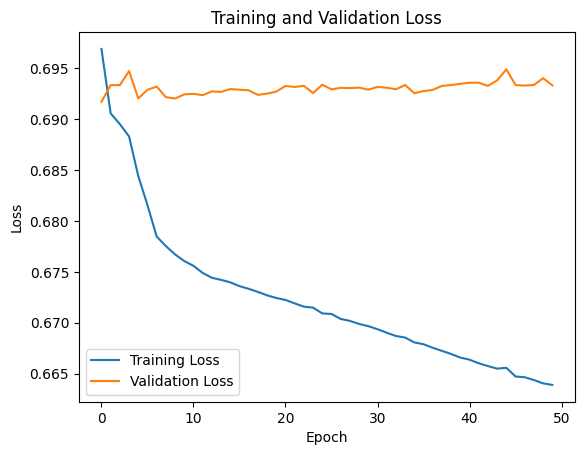

In [10]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

      alpha     theta      beta     gamma   arousal  vigilance       tli  \
0  0.422551  0.418414  0.374994  0.253345  0.887453   2.242610  0.990210   
1  0.424377  0.177828  0.405552  0.211159  0.955639   1.484904  0.419032   
2  0.169741  0.301005  0.474402  0.206036  2.794860   0.992293  1.773321   
3  0.359479  0.341031  0.409300  0.122471  1.138592   1.711483  0.948681   
4  0.277136  0.330318  0.432947  0.282534  1.562219   1.403067  1.191898   

    neutral  cnsarousal     cpari  ...    varience        std          rms  \
0  0.896227    1.115789  0.445909  ...   63.140294   7.946087  4294.245255   
1  2.280585    0.438484  0.673444  ...   97.521708   9.875308  4286.464415   
2  1.576059    0.634494  1.007766  ...   49.964360   7.068547  4284.366051   
3  1.200185    0.833205  0.584289  ...  189.791446  13.776482  4295.460244   
4  1.310699    0.762952  0.712724  ...   93.296572   9.659015  4290.839184   

       skew      kurt  mobility  complexity  peak-peak   entropy  RESPONSE

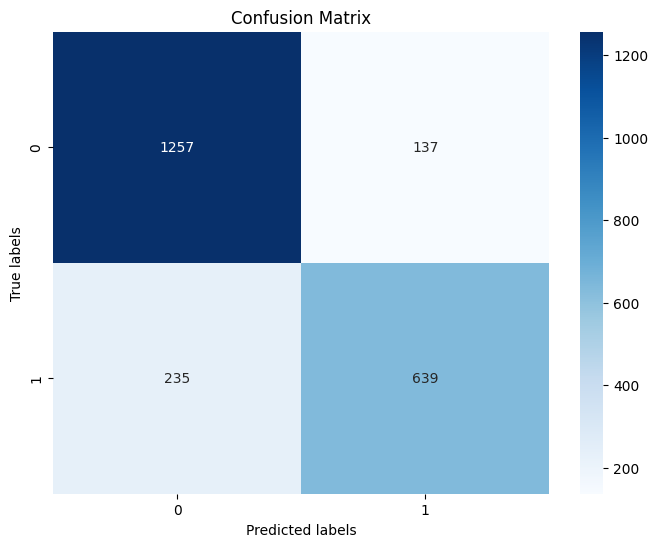

Model Accuracy: 0.84


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# ✅ Load dataset from Excel
file_path = r"C:\Users\kavin\OneDrive\Desktop\Final Project\bb\bb\F3_theta_cleaned.xlsx"  # Your uploaded dataset
df = pd.read_excel(file_path)

# ✅ Check the first few rows to understand the dataset structure
print(df.head())

# ✅ Encode categorical labels (assuming 'RESPONSE' is the target variable)
label_encoder = LabelEncoder()
df['RESPONSE'] = label_encoder.fit_transform(df['RESPONSE'])

# ✅ Separate features (X) and target labels (y)
X = df.drop(columns=['RESPONSE'])  # Drop the target column
y = df['RESPONSE']

# ✅ Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Normalize features (important for models that rely on distance metrics)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ✅ Train a simple classification model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ✅ Make predictions
y_pred = model.predict(X_test)

# ✅ Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# ✅ Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# ✅ Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

In [13]:

from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=[str(label) for label in label_encoder.classes_])

# Print classification report
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1394
           1       0.82      0.73      0.77       874

    accuracy                           0.84      2268
   macro avg       0.83      0.82      0.82      2268
weighted avg       0.84      0.84      0.83      2268

